In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn as mg

In [2]:
citibike = mg.datasets.load_citibike()

In [3]:
print(citibike.head())

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


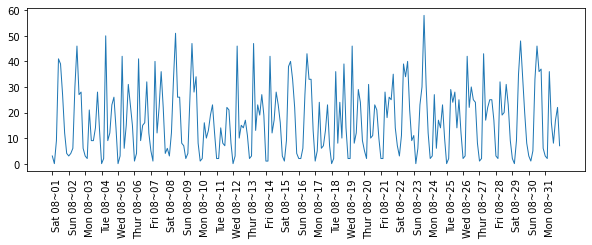

In [6]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
xticks_name = [week[int(w)] + d for w, d in zip(xticks.strftime('%w'),
                                              xticks.strftime(' %m~%d'))]

plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.plot(citibike, linewidth=1)

In [7]:
y = citibike.values
X = citibike.index.astype('int64').values.reshape(-1, 1)

/tmp/ipykernel_12658/2188799826.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  X = citibike.index.astype('int64').values.reshape(-1, 1)


In [8]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print(regressor.score(X_test, y_test))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha='left')
    
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test')
    plt.plot(range(n_train), y_pred_train, '--', label='pred')
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='test pred')
    plt.legend(loc='best')

-0.035486463625959086


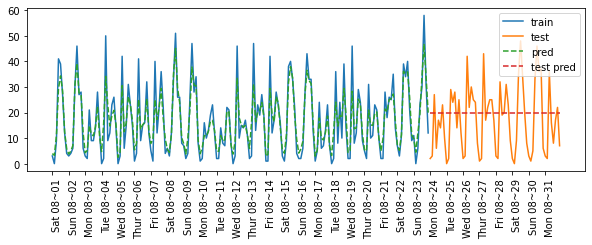

In [9]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

0.5995775993305429


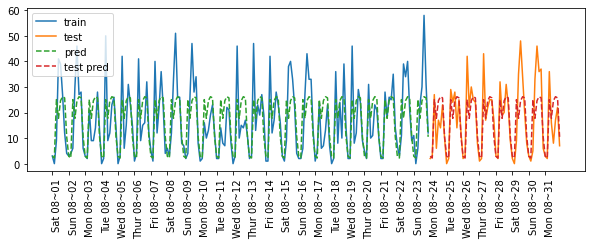

In [10]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

0.8419488587966024


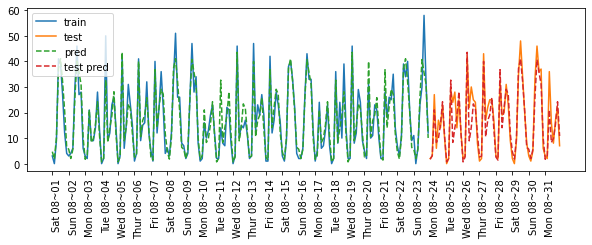

In [11]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                        citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

0.13204157262163152


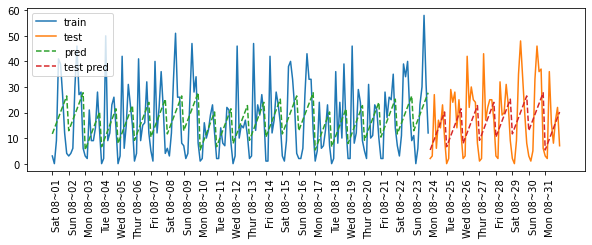

In [12]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

0.6191139168658686


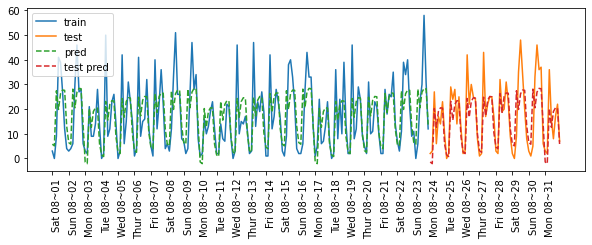

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

0.8451706357968556


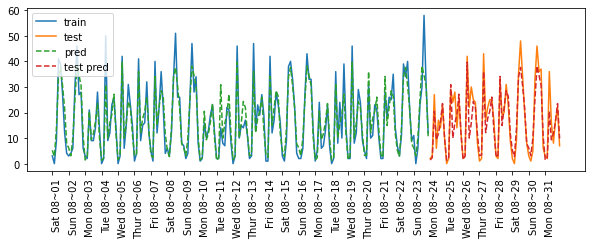

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_poly, y, lr)

In [17]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
features = day + hour

In [18]:
features_poly = poly.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero  = lr.coef_[lr.coef_ != 0]

([<matplotlib.axis.XTick at 0x7f3fdc8fb910>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thur'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun'),
  Text(7, 0, '00:00'),
  Text(8, 0, '03:00'),
  Text(9, 0, '06:00'),
  Text(10, 0, '09:00'),
  Text(11, 0, '12:00'),
  Text(12, 0, '15:00'),
  Text(13, 0, '18:00'),
  Text(14, 0, '21:00'),
  Text(15, 0, 'Mon 00:00'),
  Text(16, 0, 'Mon 03:00'),
  Text(17, 0, 'Mon 06:00'),
  Text(18, 0, 'Mon 09:00'),
  Text(19, 0, 'Mon 12:00'),
  Text(20, 0, 'Mon 15:00'),
  Text(21, 0, 'Mon 18:00'),
  Text(22, 0, 'Mon 21:00'),
  Text(23, 0, 'Tue 00:00'),
  Text(24, 0, 'Tue 03:00'),
  Text(25, 0, 'Tue 06:00'),
  Text(26, 0, 'Tue 09:00'),
  Text(27, 0, 'Tue 12:00'),
  Text(28, 0, 'Tue 15:00'),
  Text(29, 0, 'Tue 18:00'),
  Text(30, 0, 'Tue 21:00'),
  Text(31, 0, 'Wed 00:00'),
  Text(32, 0, 'Wed 03:00'),
  Text(33, 0, 'Wed 06:00'),
  Text(34, 0, 'Wed 09:00'),
  Text(35, 0, 'Wed 12:00'),
  Text(36, 0, 'Wed 15:00'),
  

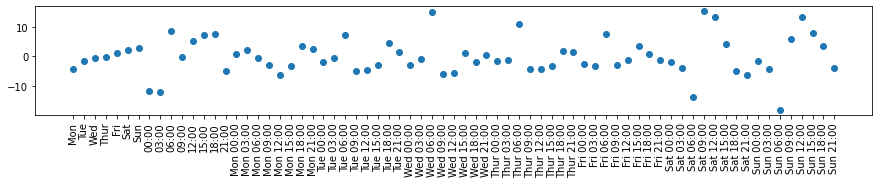

In [19]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)